In [1]:
#import required packages and functions
import os
import sys
import pandas as pd
from Bio import SeqIO
from Bio import Seq
import mappy as mp

In [2]:
#change to working directory 
os.chdir('/mnt/f/nanopore_data/telomere/AF16_extract/')
#reference genome should be put under this directory, i.e.  ../AF16_extract/genome/genome.fa

In [4]:
#Assembly is merged from miniasm assembled contigs (Total 20 contigs with BUSCO score 98.5% using nematoda_odb10) 
#referenced with CB4 from WormBase, following is dotplot for the pairwise alignment between CB4 and C. briggsae nanopore reads assembly
genome_file = str("genome/consensus_rdna.fa")
#load genome assembly for determine chimeric sequence from ONT reads
cbr_genome = mp.Aligner(genome_file, preset="map-ont")
if not cbr_genome: raise Exception("ERROR: failed to load/build index")

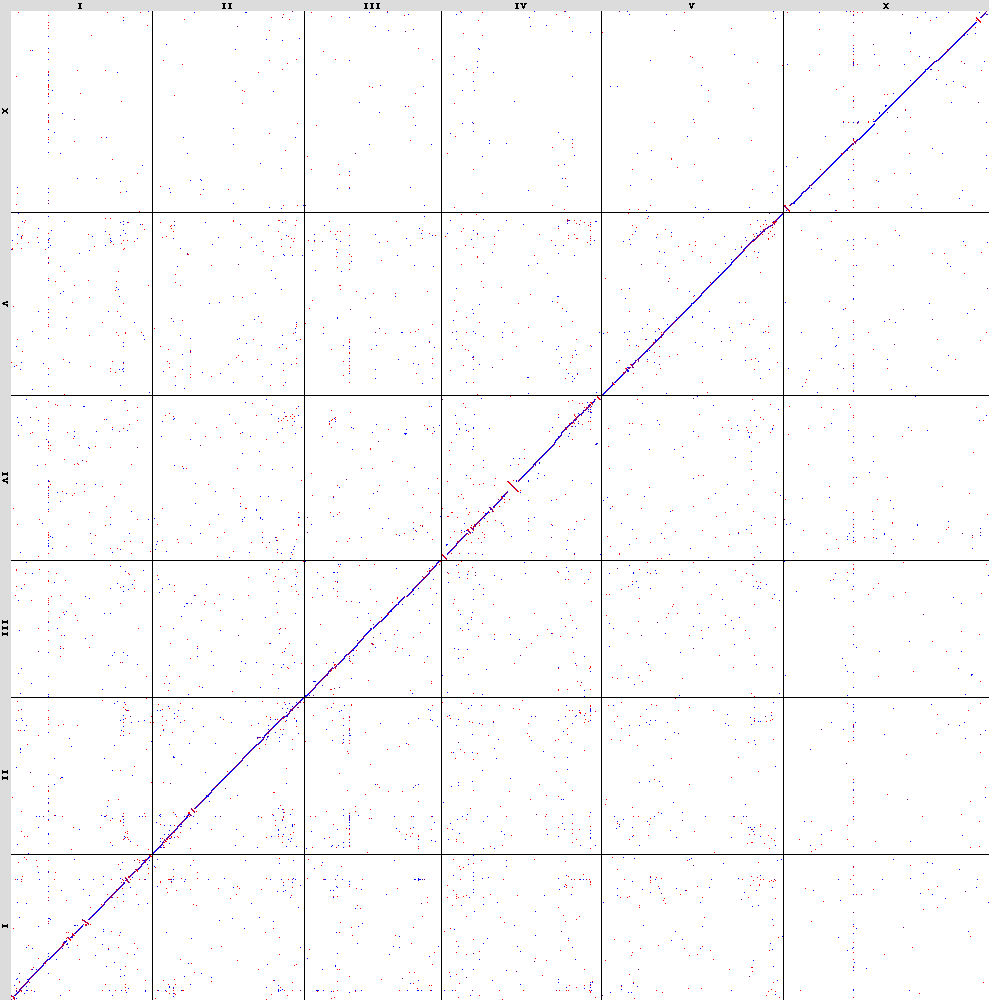

In [21]:
def XR_isEnd(trimmed_seq):
    SeqisEnd = True
    try:
        for hit in cbr_genome.map(trimmed_seq):
            if hit.ctg == "X" and hit.r_st > 21800000 and hit.r_en < 21917890 and hit.blen > 200:
                SeqisEnd = False
        return(SeqisEnd)
    except:
        return(SeqisEnd)
#nanopore reads sequence filtering parameter
#align trimmed sequences to the C. briggsae genome assembly and check whether it is chimeric
def checkChimeric(trimmed_seq):
    chimeric = False
    try:
        for hit in cbr_genome.map(trimmed_seq):
            if hit.mapq == 60:
                chimeric = True
        return(chimeric)
    except:
        return(chimeric)

#trim reads by blastn against chromosome end sequences
def trimSeq(df_blast):
    global chrom, position, forward_counter, reverse_counter, short_counter, non_end_counter,\
    self_duplication_counter, chimeric_counter, read_total_length, telomere_total_length, \
    readName, forward_total_length, reverse_total_length
    if chrom == "X" and position == "R":
        if len(df_blast) == 0:#non-chromosomal end reads
            non_end_counter += 1
        elif len(df_blast) > 2:#self duplication reads
            self_duplication_counter += 1
        else:
            if  str(df_blast.iloc[0,-1]) == "plus":#if read belongs to forward strand
                telomere_end = df_blast["send"].max()
                out_seq = read_seq[telomere_end:]
                if len(out_seq) < 12:#skip too short telomere sequence < 12 bp
                    short_counter += 1
                    read_total_length += len(read_seq)
                else:
                    if checkChimeric(out_seq) == True:#if trimmed sequences have other chomosomal alignment
                        chimeric_counter +=1
                    elif XR_isEnd(out_seq) == False:
                        non_end_counter += 1
                    else:
                        forward_out_w.write(str(">%s\n" %(readName)))
                        forward_out_w.write(out_seq+"\n")
                        out_w.write(str(">%s\n" %(readName)))
                        out_w.write(out_seq+"\n")
                        forward_counter += 1
                        forward_total_length += len(out_seq)
                        read_total_length += len(read_seq)
                        telomere_total_length += len(out_seq)
            else:#if read belongs to reverse strand
                telomere_end = df_blast["send"].min()
                out_seq = Seq.reverse_complement(read_seq[:telomere_end-1])
                if len(out_seq) < 12:#skip too short telomere length < 12 bp
                    short_counter += 1
                    read_total_length += len(read_seq)
                else:
                    if checkChimeric(out_seq) == True:#if trimmed sequences have other chomosomal alignment
                        chimeric_counter +=1
                    elif XR_isEnd(out_seq) == False:
                        non_end_counter += 1
                    else:
                        reverse_out_w.write(str(">%s\n" %(readName)))
                        reverse_out_w.write(out_seq+"\n")
                        out_w.write(str(">%s\n" %(readName)))
                        out_w.write(out_seq+"\n")
                        reverse_counter += 1
                        reverse_total_length += len(out_seq)
                        read_total_length += len(read_seq)
                        telomere_total_length += len(out_seq)
    elif chrom == "X" and position == "L":
        if len(df_blast) == 0:#non-chromosomal end reads
            non_end_counter += 1
        elif len(df_blast) > 2:#self duplication reads
            self_duplication_counter += 1
        else:
            if  str(df_blast.iloc[0,-1]) == "plus":#if read belongs to forward strand
                telomere_end = df_blast["send"].max()
                out_seq = read_seq[telomere_end:]
                if len(out_seq) < 12:#skip too short telomere sequence < 12 bp
                    short_counter += 1
                    read_total_length += len(read_seq)
                else:
                    if checkChimeric(out_seq) == True:#if trimmed sequences have other chomosomal alignment
                        chimeric_counter +=1
                    else:
                        forward_out_w.write(str(">%s\n" %(readName)))
                        forward_out_w.write(out_seq+"\n")
                        out_w.write(str(">%s\n" %(readName)))
                        out_w.write(out_seq+"\n")
                        forward_counter += 1                        
                        forward_total_length += len(out_seq)
                        read_total_length += len(read_seq)
                        telomere_total_length += len(out_seq)
            else:#if read belongs to reverse strand
                telomere_end = df_blast["send"].min()
                out_seq = Seq.reverse_complement(read_seq[:telomere_end-1])
                if len(out_seq) < 12:#skip too short telomere length < 12 bp
                    short_counter += 1
                    read_total_length += len(read_seq)
                else:
                    if checkChimeric(out_seq) == True:#if trimmed sequences have other chomosomal alignment
                        chimeric_counter +=1
                    else:
                        reverse_out_w.write(str(">%s\n" %(readName)))
                        reverse_out_w.write(out_seq+"\n")
                        out_w.write(str(">%s\n" %(readName)))
                        out_w.write(out_seq+"\n")
                        reverse_counter += 1
                        reverse_total_length += len(out_seq)
                        read_total_length += len(read_seq)
                        telomere_total_length += len(out_seq)
    else: 
        if len(df_blast) == 0:#non-chromosomal end reads
            non_end_counter += 1
        elif len(df_blast) > 1:#self duplication reads
            self_duplication_counter += 1
        else:
            if  str(df_blast.iloc[0,-1]) == "plus":#if read belongs to forward strand
                telomere_end = df_blast["send"].max()
                out_seq = read_seq[telomere_end:]
                if len(out_seq) < 12:#skip too short telomere sequence < 12 bp
                    short_counter += 1
                    read_total_length += len(read_seq)
                else:
                    if checkChimeric(out_seq) == True:#if trimmed sequences have other chomosomal alignment
                        chimeric_counter +=1
                    else:
                        forward_out_w.write(str(">%s\n" %(readName)))
                        forward_out_w.write(out_seq+"\n")
                        out_w.write(str(">%s\n" %(readName)))
                        out_w.write(out_seq+"\n")
                        forward_counter += 1                        
                        forward_total_length += len(out_seq)
                        read_total_length += len(read_seq)
                        telomere_total_length += len(out_seq)
            else:#if read belongs to reverse strand
                telomere_end = df_blast["send"].min()
                out_seq = Seq.reverse_complement(read_seq[:telomere_end-1])
                if len(out_seq) < 12:#skip too short telomere length < 12 bp
                    short_counter += 1
                    read_total_length += len(read_seq)
                else:
                    if checkChimeric(out_seq) == True:#if trimmed sequences have other chomosomal alignment
                        chimeric_counter +=1
                    else:
                        reverse_out_w.write(str(">%s\n" %(readName)))
                        reverse_out_w.write(out_seq+"\n")
                        out_w.write(str(">%s\n" %(readName)))
                        out_w.write(out_seq+"\n")
                        reverse_counter += 1
                        reverse_total_length += len(out_seq)
                        read_total_length += len(read_seq)
                        telomere_total_length += len(out_seq)
def blastn_filter(chrom, position, readName):
    global blastn_info
    if chrom == "I" and position == "L":
        df_return = blastn_info[(blastn_info["subject"]== readName)&\
                                (blastn_info["qstart"] < 5350)&\
                                (blastn_info["qend"] > 9950)]
        return (df_return)
    elif chrom == "I" and position == "R":
        df_return = blastn_info[(blastn_info["subject"]== readName)&\
                                (blastn_info["length"] > 200)&\
                                (blastn_info["qend"] > 19950)]
        return (df_return)
    elif chrom == "II" and position == "L":
        df_return = blastn_info[(blastn_info["subject"]== readName)&\
                                (blastn_info["length"] > 200)&\
                                (blastn_info["qend"] > 19050) &\
                                (blastn_info["qend"] < 19120)]
        return (df_return)
    elif chrom == "II" and position == "R":
        df_return = blastn_info[(blastn_info["subject"]== readName)&\
                                (blastn_info["qend"] > 9950)]
        return (df_return)
    elif chrom == "III" and position == "L":
        df_return = blastn_info[(blastn_info["subject"]== readName)&\
                                (blastn_info["qend"] > 9950)&\
                                (blastn_info["qstart"] < 7900)]
        return (df_return)
    elif chrom == "III" and position == "R":
        df_return = blastn_info[(blastn_info["subject"]== readName)&\
                                (blastn_info["qend"] > 9950)]
        return (df_return)
    elif chrom == "IV" and position == "L":
        df_return = blastn_info[(blastn_info["subject"]== readName)&\
                                (blastn_info["length"] > 100)&\
                                (blastn_info["qend"] > 19900)]
        return (df_return)
    elif chrom == "IV" and position == "R":
        df_return = blastn_info[(blastn_info["subject"]== readName)&\
                                (blastn_info["length"] > 490)&\
                                (blastn_info["qend"] > 19950)]
        return (df_return)
    elif chrom == "V" and position == "L":
        df_return = blastn_info[(blastn_info["subject"]== readName)&
                                (blastn_info["qstart"] <17000)&
                                (blastn_info["qend"] > 17450)]
        return (df_return)
    elif chrom == "V" and position == "R":
        df_return = blastn_info[(blastn_info["subject"]== readName)&
                                (blastn_info["length"] > 100)&
                                (blastn_info["qend"] > 19950)]
        return (df_return)
    elif chrom == "X" and position == "L":
        df_return = blastn_info[(blastn_info["subject"]== readName)&\
                                (blastn_info["qstart"] < 7900)&\
                                (blastn_info["qend"] >9950)]
        return (df_return)
    elif chrom == "X" and position == "R":
        df_return = blastn_info[(blastn_info["subject"]== readName)&\
                                (blastn_info["qend"] > 19950)]
        return (df_return)
def write_log(stage, chrom, position):
    global forward_counter, reverse_counter, short_counter, non_end_counter,\
    self_duplication_counter, chimeric_counter, read_total_length, telomere_total_length,\
    forward_total_length, reverse_total_length
    fr_sum = forward_counter + reverse_counter
    forward_average_length = forward_total_length / forward_counter
    reverse_average_length = reverse_total_length / reverse_counter
    read_average_length = read_total_length /(fr_sum + short_counter)
    telomere_average_length = telomere_total_length/ (fr_sum)
    read_info = str("%s\t%s\t%s"%( stage, chrom, position))
    log_out.write("{}\t{}\tTelomere_reads_count\n".format(read_info, fr_sum))#Telomere reads count
    log_out.write("{}\t{}\tForward_strand_count\n".format(read_info, forward_counter))#Forward strand count
    log_out.write("{}\t{:.1f}\tForward_telomere_average_length\n".format(read_info, forward_average_length))
    log_out.write("{}\t{:.1f}\tReverse_strand_count\n".format(read_info, reverse_counter))#Reverse strand count
    log_out.write("{}\t{:.1f}\tReverse_telomere_average_length\n".format(read_info, reverse_average_length))
    log_out.write("{}\t{:.1f}\tAverage_read_length\n".format(read_info, read_average_length))#Average read length
    log_out.write("{}\t{:.1f}\tAverage_telomere_length\n".format(read_info, telomere_average_length))#Average telomere length
    log_out.write("{}\t{}\tShort_read_count\n".format(read_info, short_counter))#Short read count
    log_out.write("{}\t{}\tNon-end_read_count\n".format(read_info, non_end_counter))#Non-end read count
    log_out.write("{}\t{}\tSelf_duplication_count\n".format(read_info, self_duplication_counter))#Self duplication count
    log_out.write("{}\t{}\tChimeric_reads_count\n".format(read_info, chimeric_counter))#Chimeric reads count
    sys.stdout.write('\r'+"{}\tfinished".format(read_info))
def enumerateRepeat(telo_repeat = "TTAGGC"):
    telo_list = []
    for idx, char in enumerate(telo_repeat):
        motif = telo_repeat[idx:]+telo_repeat[:idx]
        telo_list.append(motif)
    return(telo_list)
def tide_filter(readName):
    global tide_info
    df_tide_return = tide_info[(tide_info["readName"]== readName)]
    return (df_tide_return)

In [22]:
stg = ["AF16"]
chromosome = ["I", "II", "III", "IV", "V", "X"]
chrend = ["L", "R"]
strand = ["F", "R"]

In [ ]:
#the extracted chromosome end reads were blastn against chromosome end sequences
#generate a file of read name list with bash command cut and awk to extract the read name from blastn result(the 2nd column)

for chrom in chromosome:
    for position in chrend:
        #input file path
        read_file = str("fasta/AF16_%s%s.fa" % (chrom, position))
        ref_file = str("chr_ref/AF16_%s%s.fa" % (chrom, position))
        #output blastn result and read name list
        blastn_file = str("blastn/AF16_%s%s.tsv" % (chrom, position))
        read_list_file = str("read_list_blastn/AF16_%s%s_list" % (chrom, position))
        #index extracted input fasta file
        !samtools faidx $read_file
        #against chromosome end sequence to extracted reads
        !blastn -query $ref_file -subject $read_file -outfmt "6 std sstrand" -max_target_seqs 999999999 -out $blastn_file
        #get the read name list from blastn result
        !cut -f2 $blastn_file | awk '!seen[$0]++' > $read_list_file
        print(str("AF16_%s%s finished" % ( chrom, position)))
#Alternatively, following command can be finished in shell
#chrom=("I" "II" "III" "IV" "V" "X")
#position=("L" "R")
#for j in ${chrom[@]}
#do
#for k in ${position[@]}
#do
#blastn -query chr_ref/AF16_${j}${k}.fa -subject fasta/AF16_${j}${k}.fa -outfmt "6 std sstrand" -max_target_seqs 999999999 -out blastn/AF16_${j}${k}.tsv
#cut -f2 blastn/AF16_${j}${k}.tsv | awk '!seen[$0]++' > read_list_blastn/AF16_${j}${k}_list
#done
#done

In [23]:
#file name of statistic results
outlog_fh = str("trimming_result/log/AF16_YA_trimming_result.tsv")
#trim read sequences with blastn result and write statistic result to file
#telomere sequences seperated by strand and chromosome end, with full length Nanopore read sequences
with open(outlog_fh, "w") as log_out:#write statistic result
    log_out.write("Stage\tChromosome\tEnd\tValue\tAttribute\n")#Telomere reads count
    for stage in stg:
        for chrom in chromosome:
            for position in chrend:
                #read in files path
                raw_fasta = str("fasta/%s_%s%s.fa" % (stage, chrom, position))#input fasta
                blastn_file = str("blastn/%s_%s%s.tsv" % (stage, chrom, position))#input blastn result
                read_list_file = str("read_list_blastn/%s_%s%s_list" % (stage, chrom, position))#input readname list
                #output file path
                output_fh = str("trimming_result/telomere_only/%s_%s%s.fa" % (stage, chrom, position)) #output file path
                forward_output_fh = str("trimming_result/strand/%s_%s%s_F.fa" % (stage, chrom, position)) #output file path
                reverse_output_fh = str("trimming_result/strand/%s_%s%s_R.fa" % (stage, chrom, position)) #output file path
                #read input fasta and blastn result to convert sequences from central chromosome to end
                read_dict = SeqIO.index(raw_fasta, "fasta")#index extracted read sequence from BAM file
                blastn_info = pd.read_csv(blastn_file, sep = "\t",header=None,index_col=False)#pandas read blastn result 
                blastn_info.columns = ["query", "subject", "identity", "length", "mis","gap","qstart","qend","sstart","send","evalue","bit","strand"]#assgin column names
                forward_counter = 0
                forward_total_length = 0
                reverse_counter = 0
                reverse_total_length = 0
                short_counter = 0
                non_end_counter = 0
                chimeric_counter = 0
                self_duplication_counter = 0
                read_total_length = 0
                telomere_total_length = 0
                with open(output_fh , "w") as out_w ,open(read_list_file , "r") as read_list, \
                open(forward_output_fh , "w") as forward_out_w , open(reverse_output_fh , "w") as reverse_out_w:
                    for line in read_list:
                        readName = line.rstrip()
                        read_seq = str(read_dict[readName].seq)
                        trimSeq(blastn_filter(chrom, position, readName))#write trimmed sequences to file
                out_w.close()
                forward_out_w.close()
                reverse_out_w.close()
                read_list.close()
                #write statistic results to trim_fasta/log/ by chromosome end position
                write_log(stage, chrom, position)
log_out.close()
print("\njob finished!")            

AF16	X	R	finisheddd
job finished!


In [ ]:
#analyze sequence length with seqkit, telomere repeat with Tidehunter, and get the trimmed telomere sequences read name
#you can run it in shell
%%bash
mkdir -p trimming_result/tidehunter/
mkdir -p trimming_result/tidehunter/stats/
mkdir -p trimming_result/ONT_reads/
mkdir -p trimming_result/log/
stage=("AF16")
chrom=("I" "II" "III" "IV" "V" "X")
position=("L" "R")
strand=("F" "R")
for i in ${stage[@]}
do
for j in ${chrom[@]}
do
for k in ${position[@]}
do
for l in  ${strand[@]}
do
samtools faidx trimming_result/telomere_only/${i}_${j}${k}.fa
samtools faidx trimming_result/strand/${i}_${j}${k}_${l}.fa
seqkit stats -a trimming_result/telomere_only/${i}_${j}${k}.fa -T|tail -1 >> trimming_result/log/AF16_telomere_stats.tsv
TideHunter -f 2 -P 8 -p 4 -k 3 trimming_result/strand/${i}_${j}${k}_${l}.fa > trimming_result/tidehunter/${i}_${j}${k}_${l}_P8p4k3.tsv
seqkit seq trimming_result/telomere_only/${i}_${j}${k}.fa -n -i> trimming_result/telomere_only/${i}_${j}${k}_list
seqkit seq trimming_result/strand/${i}_${j}${k}_${l}.fa -n -i> trimming_result/ONT_reads/${i}_${j}${k}_${l}_list
seqtk subseq fasta/${i}_${j}${k}.fa trimming_result/ONT_reads/${i}_${j}${k}_${l}_list > trimming_result/ONT_reads/${i}_${j}${k}_${l}.fa
samtools faidx trimming_result/ONT_reads/${i}_${j}${k}_${l}.fa
done
done
done
done


In [24]:
#generate a canonical telomere repeat and loop list
canonical = "TTAGGC"#canonical telomere repeat in C. elegans
canonical_list = enumerateRepeat(canonical)#looping telomere sequence
canonical_list

['TTAGGC', 'TAGGCT', 'AGGCTT', 'GGCTTA', 'GCTTAG', 'CTTAGG']

In [15]:
#prepare directory to save results
%%bash
mkdir -p trimming_result/tidehunter/stats/coverage/
mkdir -p trimming_result/tidehunter/stats/unsort/
mkdir -p trimming_result/tidehunter/stats/sorted/

In [25]:
#make telomere repeat statistic file and coverage file
for stage in stg:
    for chrom in chromosome:
        for position in chrend:
            for direction in strand:
                #print("\n=========={} {}{} {} strand start==========".format(stage, chrom, position, direction))
                #read in files path
                tide_file = str("trimming_result/tidehunter/%s_%s%s_%s_P8p4k3.tsv" % (stage, chrom, position, direction))#input Tidehunter tabular results
                trimmed_read_list_file = str("trimming_result/ONT_reads/%s_%s%s_%s_list" % (stage, chrom, position, direction))#input readname list
                #output file path
                output_log_fh = str("trimming_result/tidehunter/stats/unsort/%s_%s%s_%s_stats.tsv" % (stage, chrom, position, direction)) #output file path
                output_table_fh = str("trimming_result/tidehunter/stats/coverage/%s_%s%s_%s_Coverage.tsv" % (stage, chrom, position, direction)) #output coverage file path
                #input Tidehunter tabular result as tide_info with pandas
                tide_info = pd.read_csv(tide_file, sep = "\t",header=None,index_col=False)#pandas read blastn result 
                tide_info.columns = ["readName", "consN", "readLen", "start", "end","consLen","copyNum","fullLen","subPos","consensus"]#assgin 10 column names to Tidehunter table
                Coverage = pd.DataFrame({"TTAGGC": [0] * 12000})#make a single column coverage df for canonical repeat
                new_motif_counter = 0#newly found repeat counter
                canonical_copyNum = 0#copy number caculater
                with open(trimmed_read_list_file,"r") as read_list, open(output_log_fh, "w") as out_log:
                    for line in read_list:#readIn read name from line
                        readName = line.rstrip()#get readName from line in read name list file
                        df_read_repeat = tide_filter(readName)#select rows with readName
                        #looping rows for read
                        for idx in range(len(df_read_repeat)):
                            working_motif = df_read_repeat.iloc[idx].consensus#assign name for the consensus in the row
                            if working_motif in canonical_list:#if consensus is canonical repeat sequence in the canonical list
                                canonical_copyNum += df_read_repeat.iloc[idx].copyNum
                                for i in range(df_read_repeat.iloc[idx].start - 1, df_read_repeat.iloc[idx].end):
                                    Coverage.TTAGGC[i] += 1#add data to table
                            #if consensus is not a canonical telomere repeat
                            elif new_motif_counter == 0:#if working consensus is the first found repeat
                                new_motif_counter += 1#new repeat found +1
                                tmp_name = "new_repeat" + str(new_motif_counter)#assign name
                                sys.stdout.write('\r'+str("%s %s%s %s %dst %d-mer motif: %s" %(stage, chrom, position, direction, new_motif_counter, len(working_motif), working_motif)))#print newly identified repeat
                                vars()[tmp_name] = enumerateRepeat(working_motif)#generate a list for the first found new repeat
                                vars()[tmp_name + "_repeat"] = working_motif#assign consensus sequences to a new repeat 
                                Coverage[tmp_name] = [0] * 12000#add a empty column to table for the new repeat
                                repeat_col = "Coverage." + tmp_name#assign name
                                for i in range(df_read_repeat.iloc[idx].start - 1, df_read_repeat.iloc[idx].end):
                                    eval(repeat_col)[i] += 1#add data of new repeat to table
                            else:
                                observed = "False"
                                for k in range(new_motif_counter):#search newly found repeats
                                    tmp_name = "new_repeat" + str(k +1)#assign name
                                    if working_motif in vars()[tmp_name]:#if repeat has been found
                                        repeat_col = "Coverage." + tmp_name#assign name
                                        vars()[tmp_name + "_repeat"] = working_motif#assign consensus sequences to new repeat 
                                        observed = "True"
                                        for i in range(df_read_repeat.iloc[idx].start - 1, df_read_repeat.iloc[idx].end):
                                            eval(repeat_col)[i] += 1#add data to table
                                        break
                                if observed == "False": #if working consensus is a new repeat
                                    new_motif_counter += 1#new repeat found +1
                                    tmp_name = "new_repeat" + str(new_motif_counter)#assign name
                                    sys.stdout.write('\r'+str("%s %s%s %s %dth %d-mer motif: %s" %(stage, chrom, position, direction, new_motif_counter, len(working_motif), working_motif)))#print newly identified repeat
                                    vars()[tmp_name] = enumerateRepeat(working_motif)#generate a list for the newly found repeat
                                    vars()[tmp_name + "_repeat"] = working_motif#assign consensus sequences to new repeat 
                                    Coverage[tmp_name] = [0] * 12000#add a empty column to table
                                    repeat_col = "Coverage." + tmp_name
                                    for i in range(df_read_repeat.iloc[idx].start - 1, df_read_repeat.iloc[idx].end):
                                        eval(repeat_col)[i] += 1
                    out_log.write("RepeatSeq\tConsensus\tCopyNum\n")
                    out_log.write("canonical\t{}\t{:.1f}\n".format(canonical, canonical_copyNum))
                    if new_motif_counter > 0:
                        for k in range(new_motif_counter):
                            repeat_name =  "new_repeat" + str(k+1)
                            out_log.write("{}\t{}\t{:.1f}\n".format(repeat_name, vars()[repeat_name + "_repeat"], eval("Coverage." + repeat_name + ".sum()") / 6))
                read_list.close()
                out_log.close()
                Coverage.to_csv(output_table_fh, index=False, header=True, sep="\t")
print("\nMerging repeat finished")

AF16 XR R 114th 6-mer motif: CTGAGCTTAC
Merging repeat finished


In [26]:
#sort telomere repeat stats file
for stage in stg:
    for chrom in chromosome:
        for position in chrend:
            for direction in strand:
                #read in files path
                unsort_file = str("trimming_result/tidehunter/stats/unsort/%s_%s%s_%s_stats.tsv" % (stage, chrom, position, direction))#input table
                sort_fh = str("trimming_result/tidehunter/stats/sorted/%s_%s%s_%s_stats_sorted.tsv" % (stage, chrom, position, direction)) #output sorted table
                #input Tidehunter tabular result as tide_info with pandas
                unsort_info = pd.read_csv(unsort_file, sep = "\t",header= 0,index_col=False)#pandas read table 
                sort_info = unsort_info.sort_values(by ="CopyNum" , ascending = False)
                sort_info.to_csv(sort_fh, index = False, header = True, sep="\t")
                #sys.stdout.write('\r'+str("%s %s%s %s finished" %(stage, chrom, position, direction)))
print("=====Job finished=====")

=====Job finished=====


Pipeline end up here.

Following data analysis is performed in **Rstudio** with R v.3.6.1 or above

Required R packages:

**ggplot2**

**reshape2**

**grid**

**gridExtra**

**dplyr**
